We're going to plot the descriptive statistics of the first pilot subject's performance in terms of changes in accuracy and reaction times across the behavioral session.

In [1]:
!ls ../behav_data

subp1_behav.csv subp2_behav.csv


In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [80]:
sns.set_style('whitegrid')

In [20]:
# load behav data into pandas
subp2_behav = pd.read_csv('../behav_data/subp2_behav.csv')
subp2_behav.head()

,vision,rotation,file_path,object_id,object_name,set,Geschlecht,SubjectID,Alter,Rechtshaendig,...,target_pos,distr_pos,distractors,rt,accuracy,clicked_distractor,mouse_pressed,keys,ran,block
0,ri_percept,45,./Stimuli/percepts/405_r45_ri_percept.png,405,Locher,training,maennlich,p2,30,True,...,"[-15, -12]","[[-15, -8], [0.0, -8.0], [15, -8], [0, -12], [...","['Kanne', 'Gluehbirne', 'Schuh', 'Hut', 'Ente'...",3.600686,0,Kanne,True,[],True,1
1,ri_percept,225,./Stimuli/percepts/40_r225_ri_percept.png,40,Gluehbirne,training,maennlich,p2,30,True,...,"[0, -12]","[[-15, -8], [0.0, -8.0], [15, -8], [-15, -12],...","['Kanne', 'Tasse', 'Locher', 'Wuerfel', 'Hut',...",3.851117,0,Hut,True,[],True,1
2,ri_percept,90,./Stimuli/percepts/161_r90_ri_percept.png,161,Kanne,training,maennlich,p2,30,True,...,"[-15, -8]","[[0.0, -8.0], [15, -8], [-15, -12], [0, -12], ...","['Tasse', 'Locher', 'Gluehbirne', 'Hut', 'Wuer...",3.201169,0,Hut,True,[],True,1
3,ri_percept,270,./Stimuli/percepts/40_r270_ri_percept.png,40,Gluehbirne,training,maennlich,p2,30,True,...,"[-15, -8]","[[0.0, -8.0], [15, -8], [-15, -12], [0, -12], ...","['Hut', 'Schuh', 'Locher', 'Kanne', 'Tasse', '...",3.333767,1,NaN,True,[],True,1
4,ri_percept,315,./Stimuli/percepts/9_r315_ri_percept.png,9,Schuh,training,maennlich,p2,30,True,...,"[-15, -8]","[[0.0, -8.0], [15, -8], [-15, -12], [0, -12], ...","['Tasse', 'Locher', 'Ente', 'Wuerfel', 'Hut', ...",NaN,0,NaN,NaN,[],True,1


In [25]:
# check we actually have all the trials
for bl in range(1,7):
    assert(len(subp2_behav[subp2_behav.block == bl])) == 64
    
# and that all of them ran
assert np.unique(subp2_behav.ran) == True

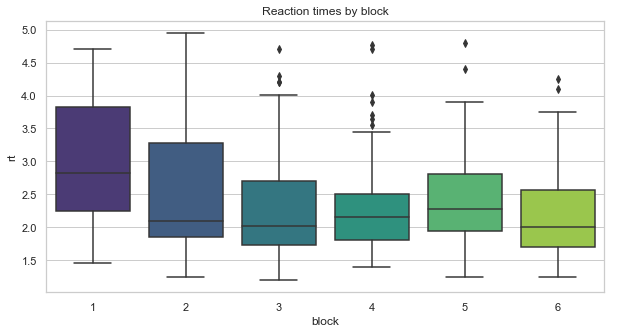

In [176]:
# reaction times by block
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="block", y="rt", data=subp2_behav, palette='viridis')
plt.title('Reaction times by block')
plt.show()

Text(0.5,1,'Accuracies by block')

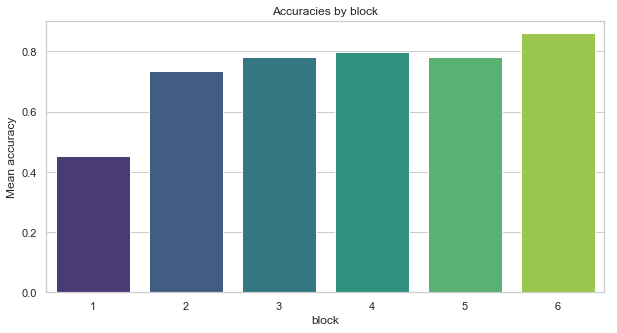

In [175]:
# plot percent correct per block

fig, ax=plt.subplots(figsize=(10,5))
sns.barplot(x="block", y="accuracy", data=subp2_behav, ax=ax, ci=None, palette='viridis')
ax.set(ylabel="Mean accuracy")
plt.title('Accuracies by block')